### EXPLORATORY DATA ANALYSIS.-AVIATION ACCIDENT PROJECT

In [ ]:
This project is meant to explore, analyse and visualize aviation accidents and related factors
such as fatalities based on various parameters
Detailed analyses of following factors:
      -The planes crashed per year.
      -People aboard per year during crashes.
      -People dead per year during crashes.
      -Fatalities versus various features of dataset.


In [ ]:
STEPS INVOLVED
-------------------------------
  1. Importing the Libraries
  2. Importing the Dataset
  3. Feature engineering
  4. EDA (Count of accidents by month, weekday, hour)
  5. EDA (Total Fatalities)
  6. Importing the second Dataset
  7. EDA (Fatalitites vs Year)
  8. EDA (Operators,Location,Type, Route)

## DATASET DESCRIPTION IN BRIEF

In [ ]:
This dataset includes:
        -All civil and commercial aviation accidents of scheduled and non-scheduled passenger airliners worldwide, 
         which resulted in a fatality (including all U.S. Part 121 and Part 135 fatal accidents).
        
Attribute Information:
        -Date:      Date of accident, in the format - January 01, 2001
        -Time:      Local time, in 24 hr. format unless otherwise specified
        -Location:  Location of the accident
        -Operator:  Airline or operator of the aircraft
        -Flight:    #Flight number assigned by the aircraft operator
        -Route:     Route flown prior to the accident
        -Type:      Aircraft type
        -Registration:ICAO registration of the aircraft
        -cn/In:     Construction or serial number / Line or fuselage number
        -Aboard:    Total aboard (passengers / crew)
        -Fatalities:Total fatalities aboard (passengers / crew)
        -Ground:    Total killed on the ground
        -Summary:   Brief description of the accident and cause if known



## IMPORTING LIBRARIES

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date, datetime,timedelta
import warnings
warnings.filterwarnings('ignore')
import matplotlib.gridspec as gridspec
%matplotlib inline

## IMPORTING DATASET

In [5]:
ac=pd.read_csv('Dataset1.csv')

In [6]:
ac.head()

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
0,09/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,07/12/1912,06:30,"AtlantiCity, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
2,08/06/1913,NaN,"Victoria, British Columbia, Canada",Private,-,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...
3,09/09/1913,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,14.0,0.0,The airship flew into a thunderstorm and encou...
4,10/17/1913,10:30,"Near Johannisthal, Germany",Military - German Navy,NaN,NaN,Zeppelin L-2 (airship),NaN,NaN,30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...


## INITIAL ANALYSIS

In [7]:
ac.shape

(5268, 13)

In [8]:
ac.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5268 entries, 0 to 5267
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          5268 non-null   object 
 1   Time          3049 non-null   object 
 2   Location      5248 non-null   object 
 3   Operator      5250 non-null   object 
 4   Flight #      1069 non-null   object 
 5   Route         3562 non-null   object 
 6   Type          5241 non-null   object 
 7   Registration  4933 non-null   object 
 8   cn/In         4040 non-null   object 
 9   Aboard        5246 non-null   float64
 10  Fatalities    5256 non-null   float64
 11  Ground        5246 non-null   float64
 12  Summary       4878 non-null   object 
dtypes: float64(3), object(10)
memory usage: 535.2+ KB


In [9]:
ac.isnull().sum()

Date               0
Time            2219
Location          20
Operator          18
Flight #        4199
Route           1706
Type              27
Registration     335
cn/In           1228
Aboard            22
Fatalities        12
Ground            22
Summary          390
dtype: int64

In [12]:
ac['Time'] = ac['Time'].replace(np.nan, '00:00') # null values in Time feature replaced

In [13]:
ac.isnull().sum()

Date               0
Time               0
Location          20
Operator          18
Flight #        4199
Route           1706
Type              27
Registration     335
cn/In           1228
Aboard            22
Fatalities        12
Ground            22
Summary          390
dtype: int64

In [14]:
ac['Time'].value_counts()

00:00     2223
15:00       32
12:00       31
11:00       29
19:30       26
          ... 
01:29        1
13:09        1
114:20       1
c14:30       1
23:27        1
Name: Time, Length: 1005, dtype: int64

In [15]:
ac['Time'].unique()

array(['17:18', '06:30', '00:00', ..., '01:25', '03:57', '15:32'],
      dtype=object)

In [16]:
ac['Time'] = ac['Time'].str.replace('c: ','')
ac['Time'] = ac['Time'].str.replace('c:','')
ac['Time'] = ac['Time'].str.replace('c','')
ac['Time'] = ac['Time'].str.replace('c: 1:00','1:00')
ac['Time'] = ac['Time'].str.replace('12\'20','12:20')
ac['Time'] = ac['Time'].str.replace('18.40','18:40')
ac['Time'] = ac['Time'].str.replace('0943','09:43')
ac['Time'] = ac['Time'].str.replace('22\'08','22:08')
ac['Time'] = ac['Time'].str.replace('114:20','00:00')

In [17]:
ac['Time'] = ac['Date'] + ' ' +ac['Time']

def todate(x):
    return datetime.strptime(x, '%m/%d/%Y %H:%M')

ac['Time'] = ac['Time'].apply(todate)

In [18]:
print('Date ranges from ' + str(ac.Time.min()) + ' to ' + str(ac.Time.max()))

Date ranges from 1908-09-17 17:18:00 to 2009-06-08 00:00:00


In [19]:
 ac.dtypes

Date                    object
Time            datetime64[ns]
Location                object
Operator                object
Flight #                object
Route                   object
Type                    object
Registration            object
cn/In                   object
Aboard                 float64
Fatalities             float64
Ground                 float64
Summary                 object
dtype: object

In [26]:
ac.columns

Index(['Date', 'Time', 'Location', 'Operator', 'Flight #', 'Route', 'Type',
       'Registration', 'cn/In', 'Aboard', 'Fatalities', 'Ground', 'Summary'],
      dtype='object')

In [20]:
ac.Operator=ac.Operator.str.capitalize()

In [21]:
ac.head()

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
0,09/17/1908,1908-09-17 17:18:00,"Fort Myer, Virginia",Military - u.s. army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,07/12/1912,1912-07-12 06:30:00,"AtlantiCity, New Jersey",Military - u.s. navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
2,08/06/1913,1913-08-06 00:00:00,"Victoria, British Columbia, Canada",Private,-,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...
3,09/09/1913,1913-09-09 18:30:00,Over the North Sea,Military - german navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,14.0,0.0,The airship flew into a thunderstorm and encou...
4,10/17/1913,1913-10-17 10:30:00,"Near Johannisthal, Germany",Military - german navy,NaN,NaN,Zeppelin L-2 (airship),NaN,NaN,30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...


##  Accidents by Time - Analysis based on year,month,weekday,hour.

In [22]:
actemp = ac.groupby(ac.Time.dt.year)[['Date']].count()
actemp.head()

,Date
Time,
1908,1
1912,1
1913,3
1915,2
1916,5


In [23]:
actemp = actemp.rename(columns={'Date':'Count'})

In [24]:
actemp.head()

,Count
Time,
1908,1
1912,1
1913,3
1915,2
1916,5


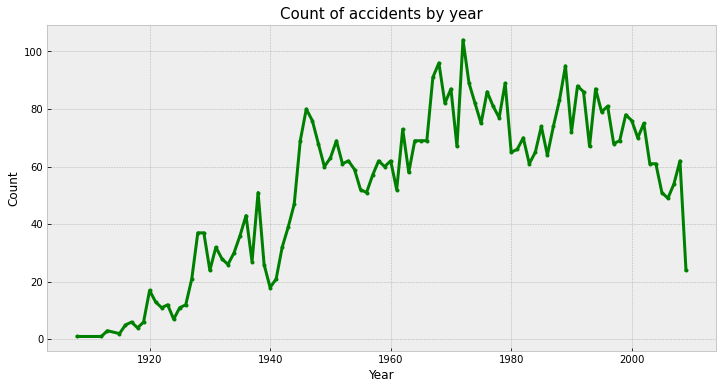

In [25]:
plt.figure(figsize=(12,6))
plt.style.use('bmh')
plt.plot(actemp.index, 'Count', data=actemp, color='green', marker='.', linewidth=3)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Count of accidents by year', fontsize=15)
plt.show()

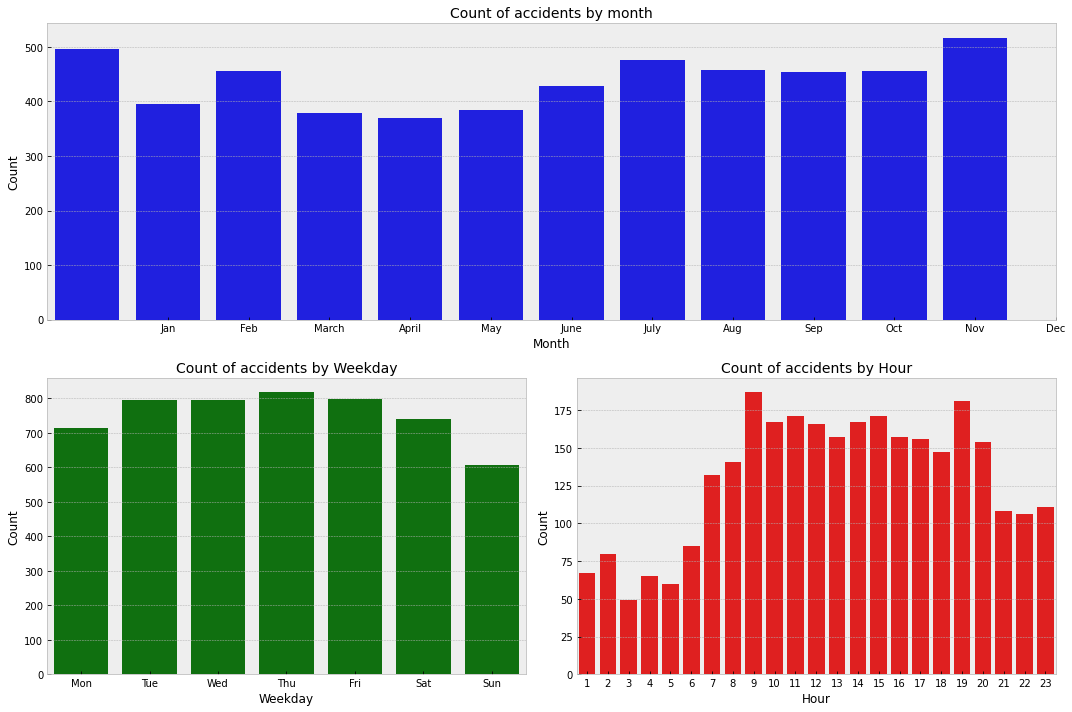

In [28]:
gs = gridspec.GridSpec(2,2)
plt.figure(figsize=(15,10))
plt.style.use('seaborn-muted')
ax = plt.subplot(gs[0,:])
sns.barplot(ac.groupby(ac.Time.dt.month)[['Date']].count().index, 'Date',
            data = ac.groupby(ac.Time.dt.month)[['Date']].count(), color='blue', linewidth=2)
plt.xticks(ac.groupby(ac.Time.dt.month)[['Date']].count().index, 
           ['Jan', 'Feb', 'March', 'April', 'May', 'June', 'July', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.xlabel('Month', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Count of accidents by month', fontsize=14)

ax = plt.subplot(gs[1,0])
sns.barplot(ac.groupby(ac.Time.dt.weekday)[['Date']].count().index, 'Date',
            data = ac.groupby(ac.Time.dt.weekday)[['Date']].count(), color='green', linewidth=3)
plt.xticks(ac.groupby(ac.Time.dt.weekday)[['Date']].count().index, 
           ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.xlabel('Weekday', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Count of accidents by Weekday', fontsize=14)

ax = plt.subplot(gs[1,1])
sns.barplot(ac[ac.Time.dt.hour != 0].groupby(ac.Time.dt.hour )[['Date']].count().index, 'Date',
            data = ac[ac.Time.dt.hour != 0].groupby(ac.Time.dt.hour)[['Date']].count(), color='red', linewidth=1)
plt.xlabel('Hour', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Count of accidents by Hour', fontsize=14)
plt.tight_layout()
plt.show()

## ANALYSIS BASED ON WHETHER THE FLIGHTS WERE PASSENGER OR MILITARY FLIGHTS

In [29]:
ac.Operator.unique()

array(['Military - u.s. army', 'Military - u.s. navy', 'Private', ...,
       'Aerotuy airline', 'Bako air', 'Strait air'], dtype=object)

In [30]:
Temp_op = ac.copy()
Temp_op['Military'] = Temp_op.Operator.str.contains('Military')
Temp_op['Passenger'] = Temp_op.Military == False
Temp_op = Temp_op.loc[:,['Time', 'Military', 'Passenger']]
Temp_op

,Time,Military,Passenger
0,1908-09-17 17:18:00,True,False
1,1912-07-12 06:30:00,True,False
2,1913-08-06 00:00:00,False,True
3,1913-09-09 18:30:00,True,False
4,1913-10-17 10:30:00,True,False
...,...,...,...
5263,2009-05-20 06:30:00,True,False
5264,2009-05-26 00:00:00,False,True
5265,2009-06-01 00:15:00,False,True
5266,2009-06-07 08:30:00,False,True


In [31]:
Temp_op = Temp_op.groupby(Temp_op.Time.dt.year)[['Military', 'Passenger']].aggregate(np.count_nonzero)

In [32]:
Temp_op 

,Military,Passenger
Time,,
1908,1,0
1912,1,0
1913,2,1
1915,2,0
1916,5,0
...,...,...
2005,7,44
2006,12,37
2007,6,48


In [33]:
Temp = ac.copy()
Temp['isMilitary'] = Temp.Operator.str.contains('Military')
Temp = Temp.groupby('isMilitary')[['isMilitary']].count()
Temp.index = ['Passenger', 'Military']
Temp

,isMilitary
Passenger,4486
Military,764


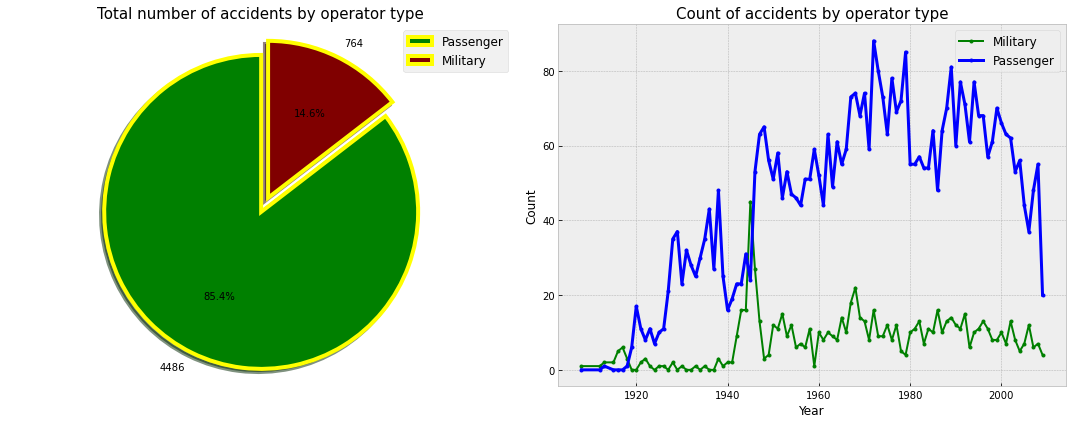

In [34]:
colors = ['green', 'maroon']
explode_val = (0, 0.1)
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
plt.pie(Temp.isMilitary, colors=colors,startangle=90,labels=Temp.isMilitary,autopct='%1.1f%%',explode=explode_val,shadow=True, wedgeprops = {'linewidth' : 4,
           'edgecolor' :'yellow'})
plt.legend(Temp.index, fontsize=12)
plt.axis('equal')
plt.title('Total number of accidents by operator type', fontsize=15)

plt.subplot(1,2,2)
plt.plot(Temp_op.index, 'Military', data=Temp_op, color='green', marker='.', linewidth=2)
plt.plot(Temp_op.index, 'Passenger', data=Temp_op, color='blue', marker='.', linewidth=3)
plt.legend(fontsize=12)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Count of accidents by operator type', fontsize=15)
plt.tight_layout()
plt.show()

INFERENCE: MILITARY FLIGHTS ACCOUNTED FOR ONLY 14.6% OF TOTAL ACCIDENTS

### TOTAL NUMBER OF FATALITIES ON BOARD BASED ON YEAR

In [35]:
Death = ac.groupby(ac.Time.dt.year).sum()
Death['Proportion'] = ac['Fatalities'] / ac['Aboard']
Death.head()

,Aboard,Fatalities,Ground,Proportion
Time,,,,
1908,2.0,1.0,0.0,1.000000
1912,5.0,5.0,0.0,1.000000
1913,51.0,45.0,0.0,0.938776
1915,60.0,40.0,0.0,1.000000
1916,109.0,108.0,0.0,1.000000


## DEATH AND DEATHRATIO VS YEAR

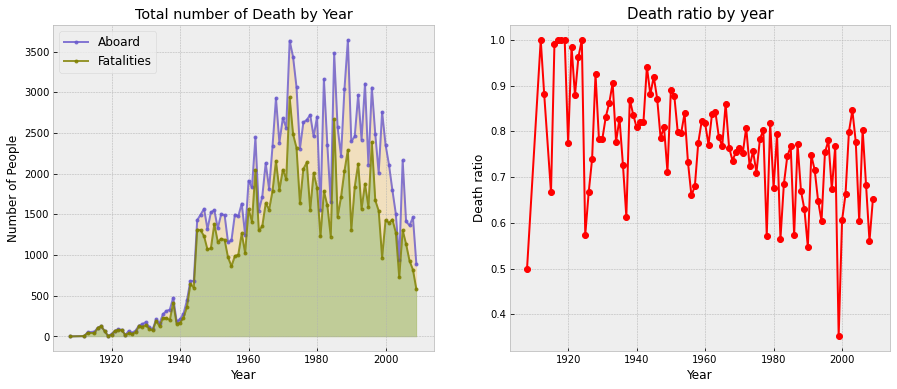

In [36]:
Death= ac.groupby(ac.Time.dt.year).sum()
Death['Proportion'] = Death['Fatalities'] / Death['Aboard']

plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.fill_between(Death.index, 'Aboard', data=Death, color='orange', alpha=0.2)
plt.plot(Death.index, 'Aboard', data=Death, marker='.', color='slateblue', alpha=0.8, linewidth=2)

plt.fill_between(Death.index, 'Fatalities', data=Death, color='green', alpha=0.2)
plt.plot(Death.index, 'Fatalities', data=Death, marker='.', color='olive', alpha=0.8, linewidth=2)

plt.legend(fontsize=12)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of People', fontsize=12)
plt.title('Total number of Death by Year')



plt.subplot(1,2,2)
plt.plot(Death.index, 'Proportion', data=Death, marker='o', color='red', linewidth=2)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Death ratio', fontsize=12)
plt.title('Death ratio by year', fontsize=15)
plt.show()

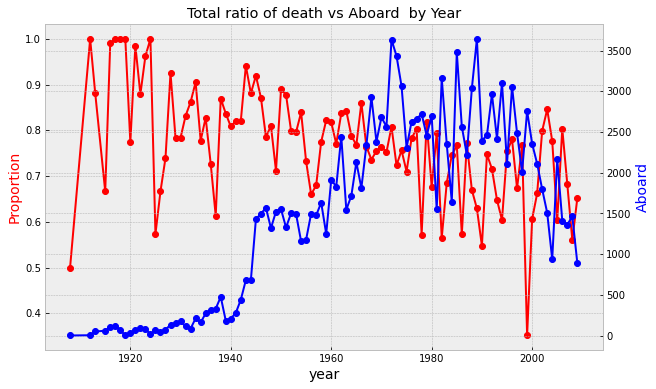

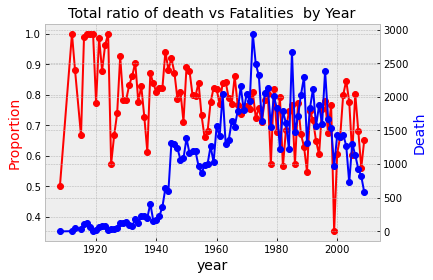

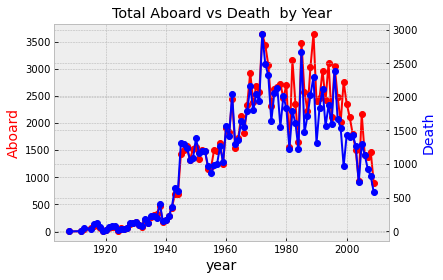

In [37]:
Death= ac.groupby(ac.Time.dt.year).sum()
Death['Proportion'] = Death['Fatalities'] / Death['Aboard']
fig=plt.figure(figsize=(10,6))
plt.subplot(1,3,3)   
ax=plt.subplot()
ax.plot(Death.index,Death['Proportion'],color="red",marker="o")
ax.set_xlabel("year",fontsize=14)
ax.set_ylabel("Proportion",color="red",fontsize=14)
ax2=ax.twinx()
ax2.plot(Death.index,Death["Aboard"],color="blue",marker="o")
ax2.set_ylabel("Aboard",color="blue",fontsize=14)
plt.title('Total ratio of death vs Aboard  by Year')
plt.show()
fig.savefig('two_different_y_axis_for_single_python_plot_with_twinx.jpg',
            format='jpeg',
            dpi=100,
            bbox_inches='tight')
plt.subplot(1,3,2)   
ax=plt.subplot()
ax.plot(Death.index,Death['Proportion'],color="red",marker="o")
ax.set_xlabel("year",fontsize=14)
ax.set_ylabel("Proportion",color="red",fontsize=14)
ax2=ax.twinx()
ax2.plot(Death.index,Death["Fatalities"],color="blue",marker="o")
ax2.set_ylabel("Death",color="blue",fontsize=14)
plt.title('Total ratio of death vs Fatalities  by Year')
plt.show()
fig.savefig('two_different_y_axis_for_single_python_plot_with_twinx.jpg',
            format='jpeg',
            dpi=100,
            bbox_inches='tight')
plt.subplot(1,3,3)   
ax=plt.subplot()
ax.plot(Death.index,Death['Aboard'],color="red",marker="o")
ax.set_xlabel("year",fontsize=14)
ax.set_ylabel("Aboard",color="red",fontsize=14)
ax2=ax.twinx()
ax2.plot(Death.index,Death["Fatalities"],color="blue",marker="o")
ax2.set_ylabel("Death",color="blue",fontsize=14)
plt.title('Total Aboard vs Death  by Year')
plt.show()
fig.savefig('two_different_y_axis_for_single_python_plot_with_twinx.jpg',
            format='jpeg',
            dpi=100,
            bbox_inches='tight')

## Dataset 2 -Dealing with yearwise total values

In [39]:
Totals = pd.read_csv('Dataset2.csv')
Totals.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,Unnamed: 64
0,Aruba,ABW,"Air transport, passengers carried",IS.AIR.PSGR,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,223502.0,274280.00,NaN,NaN
1,Afghanistan,AFG,"Air transport, passengers carried",IS.AIR.PSGR,NaN,NaN,NaN,NaN,NaN,NaN,...,2.279341e+06,1.737962e+06,2044188.0,2209428.0,1929907.0,1917924.0,1647425.0,1722612.61,NaN,NaN
2,Angola,AGO,"Air transport, passengers carried",IS.AIR.PSGR,NaN,NaN,NaN,NaN,NaN,NaN,...,9.877980e+05,1.132424e+06,1321872.0,1409952.0,1244491.0,1482546.0,1375523.0,1516628.00,NaN,NaN
3,Albania,ALB,"Air transport, passengers carried",IS.AIR.PSGR,NaN,NaN,NaN,NaN,NaN,NaN,...,8.297789e+05,8.143397e+05,865848.0,151632.0,NaN,26634.0,204090.0,303137.00,NaN,NaN
4,Andorra,AND,"Air transport, passengers carried",IS.AIR.PSGR,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [40]:
Totals = Totals.drop(['Country Name', 'Country Code', 'Indicator Code', 'Indicator Name'], axis=1)

In [41]:
Totals = Totals.replace(np.nan, 0)

In [42]:
Totals = pd.DataFrame(Totals.sum())

In [43]:
Totals.head()

,0
1960,0.0
1961,0.0
1962,0.0
1963,0.0
1964,0.0


In [44]:
Totals.tail()

,0
2016,3.104586e+10
2017,3.350035e+10
2018,3.588238e+10
2019,0.000000e+00
Unnamed: 64,0.000000e+00


In [45]:
Totals = Totals.drop(Totals.index[0:10])
Totals = Totals['1970':'2008']
Totals.columns = ['Sum']
Totals.index.name = 'Year'

In [46]:
Totals.head()

,Sum
Year,
1970,1.850484e+09
1971,1.979946e+09
1972,1.817426e+09
1973,2.388611e+09
1974,2.867234e+09


In [47]:
Fatalities = Death.reset_index()

In [48]:
Fatalities.head()

,Time,Aboard,Fatalities,Ground,Proportion
0,1908,2.0,1.0,0.0,0.500000
1,1912,5.0,5.0,0.0,1.000000
2,1913,51.0,45.0,0.0,0.882353
3,1915,60.0,40.0,0.0,0.666667
4,1916,109.0,108.0,0.0,0.990826


In [49]:
Fatalities.Time = Fatalities.Time.apply(str)
Fatalities.index = Fatalities['Time']
del Fatalities['Time']
Fatalities = Fatalities['1970':'2008']
Fatalities = Fatalities[['Fatalities']]
Totals = pd.concat([Totals,Fatalities], axis=1)
Totals['Ratio'] = Totals['Fatalities'] / Totals['Sum'] * 100

In [50]:
Totals.head()

,Sum,Fatalities,Ratio
1970,1.850484e+09,2049.0,0.000111
1971,1.979946e+09,1932.0,0.000098
1972,1.817426e+09,2937.0,0.000162
1973,2.388611e+09,2485.0,0.000104
1974,2.867234e+09,2318.0,0.000081


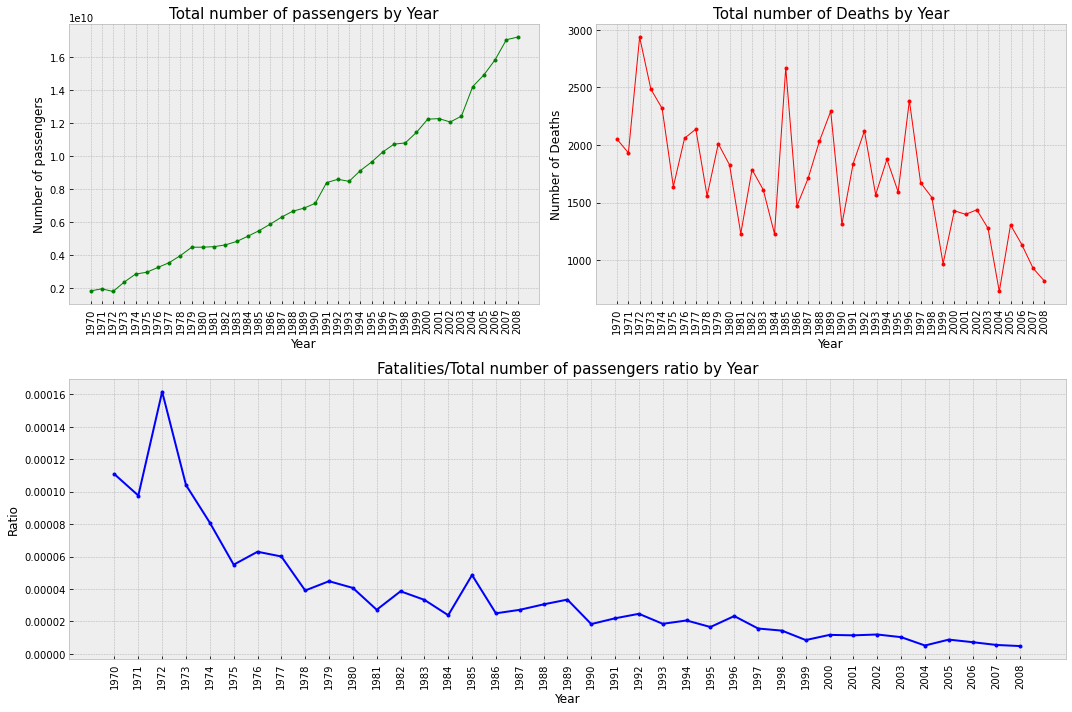

In [51]:
gs = gridspec.GridSpec(2,2)
plt.figure(figsize=(15,10))

ax= plt.subplot(gs[0,0])
plt.plot(Totals.index, 'Sum', data=Totals, marker='.', color='green', linewidth=1)
plt.xlabel('Year')
plt.ylabel('Number of passengers')
plt.title('Total number of passengers by Year', fontsize=15)
plt.xticks(rotation=90)

x= plt.subplot(gs[0,1])
plt.plot(Fatalities.index, 'Fatalities', data=Totals, marker='.', color='red', linewidth=1)
plt.xlabel('Year')
plt.ylabel('Number of Deaths')
plt.title('Total number of Deaths by Year', fontsize=15)
plt.xticks(rotation=90)

x= plt.subplot(gs[1,:])
plt.plot(Totals.index, 'Ratio', data=Totals, marker='.', color='blue', linewidth=2)
plt.xlabel('Year')
plt.ylabel('Ratio')
plt.title('Fatalities/Total number of passengers ratio by Year', fontsize=15)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## Plot ratio and number of deaths in one plot- Introduction of twinplot

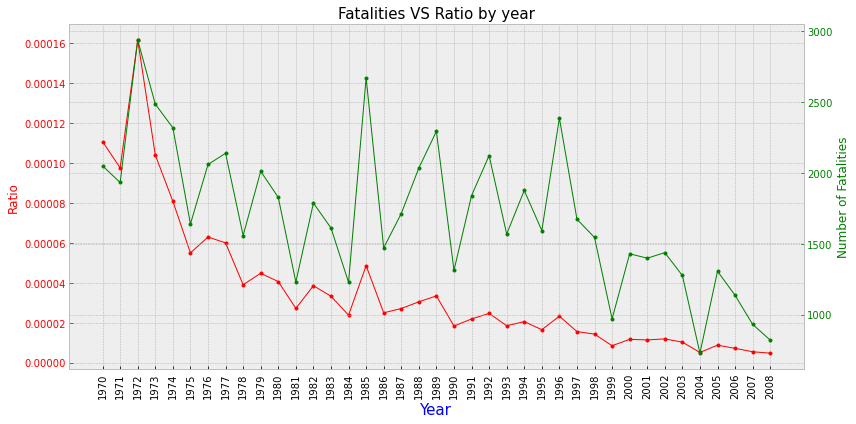

In [52]:
fig = plt.figure(figsize=(12,6))
ax1 = fig.subplots()
ax1.plot(Totals.index, 'Ratio', data=Totals, color='red', marker='.', linewidth=1)
ax1.set_xlabel('Year', fontsize=15,color='blue')
for label in ax1.xaxis.get_ticklabels():
    label.set_rotation(90),
ax1.set_ylabel('Ratio', color='red', fontsize=12)
ax1.tick_params('y', colors='red')
ax2 = ax1.twinx()
ax2.plot(Fatalities.index, 'Fatalities', data=Fatalities, color='green', marker='.', linewidth=1)
ax2.set_ylabel('Number of Fatalities', color='green', fontsize=12)
ax2.tick_params('y', colors='g')
plt.title('Fatalities VS Ratio by year', fontsize=15)
plt.tight_layout()
plt.show()

### Operator Analysis

In [53]:
ac.Operator = ac.Operator.str.upper()
ac.Operator = ac.Operator.replace("A B AEROTRANSPORT", 'AB AEROTRANSPORT')

Total_by_Op = ac.groupby('Operator')[['Operator']].count()
Total_by_Op = Total_by_Op.rename(columns={'Operator':'Count'})
Total_by_Op = Total_by_Op.sort_values(by='Count', ascending=False).head(15)

In [54]:
Total_by_Op

,Count
Operator,
AEROFLOT,179
MILITARY - U.S. AIR FORCE,176
AIR FRANCE,70
DEUTSCHE LUFTHANSA,65
AIR TAXI,48
UNITED AIR LINES,44
CHINA NATIONAL AVIATION CORPORATION,44
MILITARY - U.S. ARMY AIR FORCES,43
PAN AMERICAN WORLD AIRWAYS,41


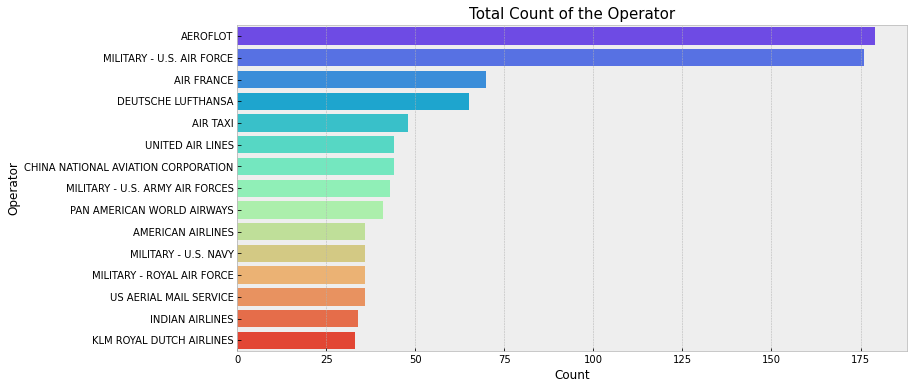

In [55]:
plt.figure(figsize=(12,6))
sns.barplot(y=Total_by_Op.index, x='Count', data=Total_by_Op, palette='rainbow', orient='h')
plt.xlabel('Count', fontsize=12)
plt.ylabel('Operator', fontsize=12)
plt.title("Total Count of the Operator", fontsize=15)
plt.show()

## OPERATOR-WISE FATALITIES.

In [56]:
Prop_by_Op = ac.groupby('Operator')[['Fatalities']].sum()
Prop_by_Op = Prop_by_Op.rename(columns={'Operator':'Fatalities'})
Prop_by_Op = Prop_by_Op.sort_values(by='Fatalities', ascending=False)
Prop_by_OpTop = Prop_by_Op.head(15)
Prop_by_OpTop

,Fatalities
Operator,
AEROFLOT,7156.0
MILITARY - U.S. AIR FORCE,3717.0
AIR FRANCE,1734.0
AMERICAN AIRLINES,1421.0
PAN AMERICAN WORLD AIRWAYS,1302.0
MILITARY - U.S. ARMY AIR FORCES,1070.0
UNITED AIR LINES,1021.0
AVIANCA,945.0
TURKISH AIRLINES (THY),891.0


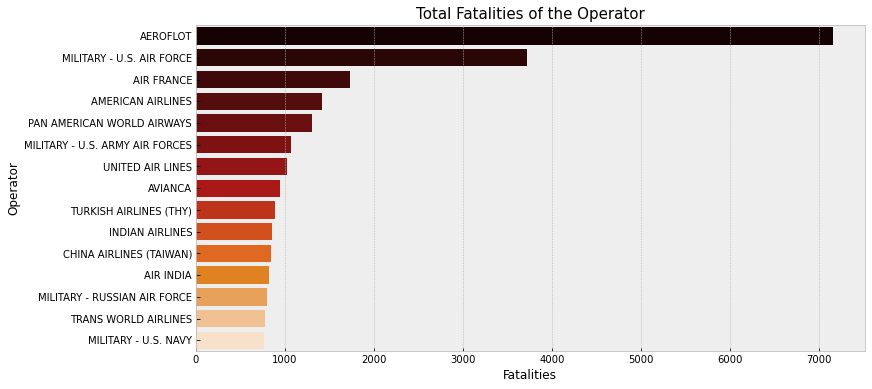

In [57]:
plt.figure(figsize=(12,6))
sns.barplot(y=Prop_by_OpTop.index, x='Fatalities', data=Prop_by_OpTop, palette='gist_heat', orient='h')
plt.xlabel('Fatalities', fontsize=12)
plt.ylabel('Operator', fontsize=12)
plt.title("Total Fatalities of the Operator", fontsize=15)
plt.show()

## OPERATORS WITH LEAST FATALITIES

In [58]:
Prop_by_Op[Prop_by_Op['Fatalities'] == Prop_by_Op.Fatalities.min()].index.tolist()

['MILITARY - EJÉRCITO DEL AIRE',
 'ARARAT AVIA',
 'HEWA BORA AIRWAYS',
 'MILITARY - UKRAINE AIR FORCE',
 'MILITARY - U.S. AIR FORCE / MILITARY U.S. AIR FORCE',
 'CANADIAN AIR TRANSAT',
 'MILITARY U.S. NAVY',
 'ISLAND SKY FERRY - AIR TAXI',
 'US AIRWAYS',
 'SOUTHWEST AIRLINES',
 'CENTURIAN AIR CARGO',
 'AMERICAN INTERNATIONAL AIRWAYS',
 'REGIONAL COMPAGNIE AERIENNE EUROPEENNE',
 'WESTERN HELICOPTER']

## COUNT OF ACCIDENTS BY YEAR FOR HIGHEST RANKING IN FATALITIES- AEROFLOT

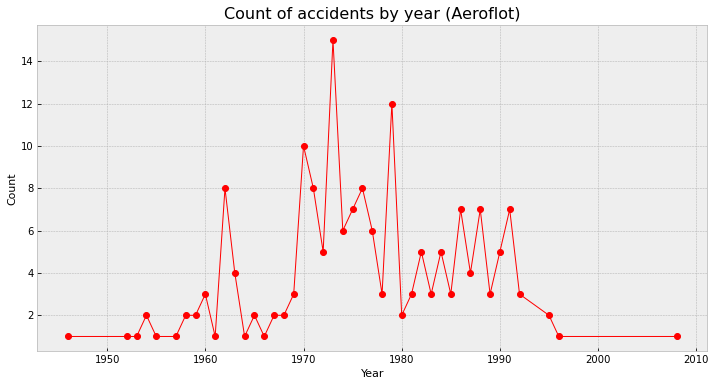

In [59]:
Aeroflot =ac[ac.Operator == 'AEROFLOT']
Count_by_year = Aeroflot.groupby(ac.Time.dt.year)[['Date']].count()
Count_by_year = Count_by_year.rename(columns={'Date':'Count'})
plt.figure(figsize=(12,6))
plt.plot(Count_by_year.index, 'Count', data=Count_by_year, marker='o', color='red', linewidth=1)
plt.xlabel('Year', fontsize=11)
plt.ylabel('Count', fontsize=11)
plt.title('Count of accidents by year (Aeroflot)', fontsize=16)
plt.show()

### COUNT OF ACCIDENTS BY YEAR FOR HIGHEST RANKING IN FATALITIES- INDIAN AIRLINES

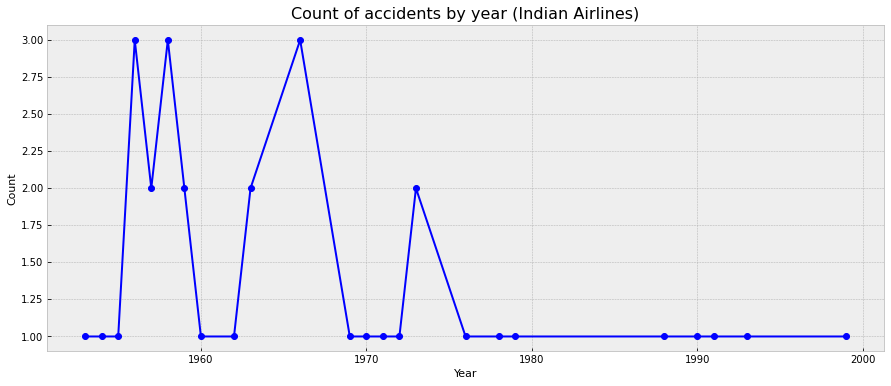

In [60]:
IA =ac[ac.Operator == 'INDIAN AIRLINES']
Count_by_year = IA.groupby(ac.Time.dt.year)[['Date']].count()
Count_by_year = Count_by_year.rename(columns={'Date':'Count'})
plt.figure(figsize=(15,6))
plt.plot(Count_by_year.index, 'Count', data=Count_by_year, marker='o', color='blue', linewidth=2)
plt.xlabel('Year', fontsize=11)
plt.ylabel('Count', fontsize=11)
plt.title('Count of accidents by year (Indian Airlines)', fontsize=16)
plt.show()

## LOCATION ANALYSIS

In [61]:
ac.Location = ac.Location.str.upper()
ac.Location.unique()

array(['FORT MYER, VIRGINIA', 'ATLANTICITY, NEW JERSEY',
       'VICTORIA, BRITISH COLUMBIA, CANADA', ...,
       'ATLANTIOCEAN, 570 MILES NORTHEAST OF NATAL, BRAZIL',
       'NEAR PORT HOPE SIMPSON, NEWFOUNDLAND, CANADA',
       'STATE OF ARUNACHAL PRADESH, INDIA'], dtype=object)

In [62]:
Total_by_Loc = ac.groupby('Location')[['Location']].count()
Total_by_Loc = Total_by_Loc.rename(columns={'Location':'Count'})
Total_by_Loc = Total_by_Loc.sort_values(by='Count', ascending=False).head(25)

In [63]:
Total_by_Loc

,Count
Location,
"SAO PAULO, BRAZIL",15
"MOSCOW, RUSSIA",15
"RIO DE JANEIRO, BRAZIL",14
"BOGOTA, COLOMBIA",13
"MANILA, PHILIPPINES",13
"ANCHORAGE, ALASKA",13
"CAIRO, EGYPT",12
"NEW YORK, NEW YORK",12
"CHICAGO, ILLINOIS",11


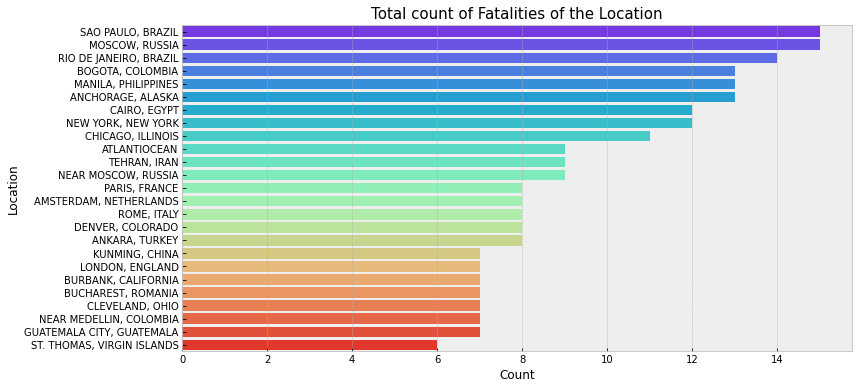

In [64]:
plt.figure(figsize=(12,6))
sns.barplot(y=Total_by_Loc.index, x='Count', data=Total_by_Loc, palette='rainbow', orient='h')
plt.xlabel('Count', fontsize=12)
plt.ylabel('Location', fontsize=12)
plt.title("Total count of Fatalities of the Location", fontsize=15)
plt.show()

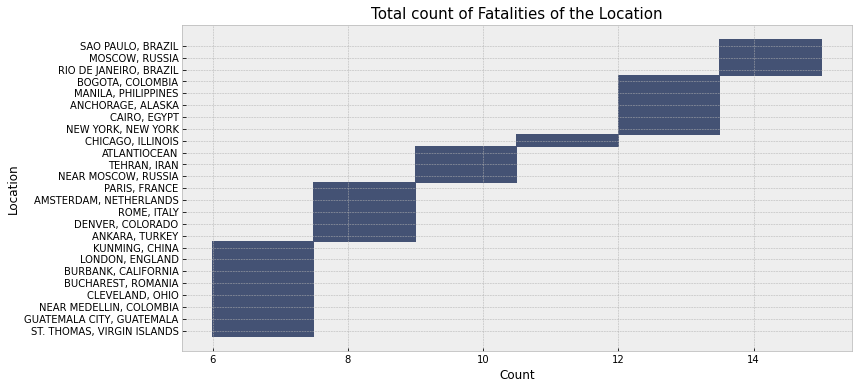

In [65]:
plt.figure(figsize=(12,6))
sns.histplot(y=Total_by_Loc.index, x='Count', data=Total_by_Loc, palette='rainbow')
plt.xlabel('Count', fontsize=12)
plt.ylabel('Location', fontsize=12)
plt.title("Total count of Fatalities of the Location", fontsize=15)
plt.show()

## Aircraft Type

In [66]:
ac.Type = ac.Type.str.upper()
ac.Type.unique()

array(['WRIGHT FLYER III', 'DIRIGIBLE', 'CURTISS SEAPLANE', ...,
       'PILATUS PC-6', 'MI-35', 'AIRBUS A330-203'], dtype=object)

In [71]:
Total_by_type = ac.groupby('Type')[['Fatalities']].count()
Total_by_type

,Fatalities
Type,
AAC-1 TOUCAN,1
AEGK,1
AERMACCHI MB-339PAN (3 AIRCRAFT),1
AERO COMMANDER 520,1
AERO COMMANDER 500-B,1
...,...
ZEPPELIN L-53 (AIRSHIP),1
ZEPPELIN L-59 (AIRSHIP),1
ZEPPELIN L-70 (AIRSHIP),1


In [74]:
Total_by_type = Total_by_type.rename(columns={'Fatalities':'Count'})
Total_by_type = Total_by_type.sort_values(by='Count', ascending=False).head(30)

In [75]:
Total_by_type

,Count
Type,
DOUGLAS DC-3,333
DE HAVILLAND CANADA DHC-6 TWIN OTTER 300,81
DOUGLAS C-47A,74
DOUGLAS C-47,61
DOUGLAS DC-4,40
YAKOVLEV YAK-40,38
ANTONOV AN-26,38
JUNKERS JU-52/3M,37
DOUGLAS C-47B,29


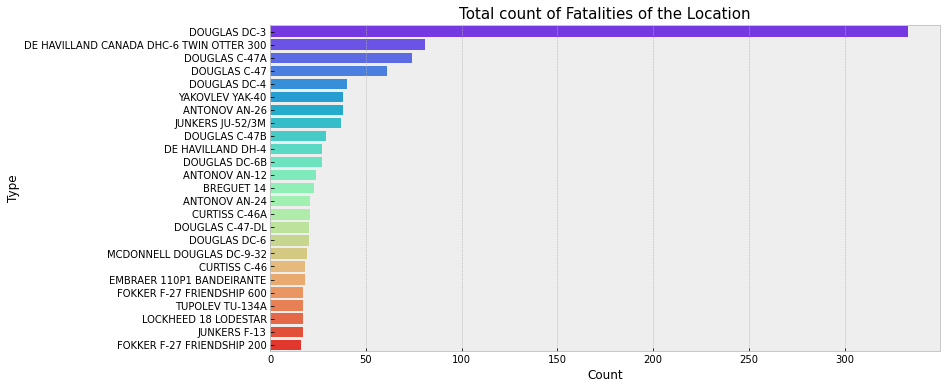

In [76]:
plt.figure(figsize=(12,6))
sns.barplot(y=Total_by_type.index, x='Count', data=Total_by_type, palette='rainbow', orient='h')
plt.xlabel('Count', fontsize=12)
plt.ylabel('Type', fontsize=12)
plt.title("Total count of Fatalities of the Location", fontsize=15)
plt.show()

## Route

In [108]:
ac.Route = ac.Route.str.upper()
ac.Route.unique()

array(['DEMONSTRATION', 'TEST FLIGHT', nan, ..., 'RIO DE JANEIRO - PARIS',
       'LOURDES DE BLANSABLON - PORT HOPE SIMPSON', 'MECHUKA FOR JORHAT'],
      dtype=object)

In [109]:
Total_by_route = ac.groupby('Route')[['Fatalities']].count()
Total_by_route

,Fatalities
Route,
- TEGUCIGALPA - TONCONTIN,1
ABACO - MIAMI,1
ABADAN - TEHRAN,1
ABAKAN - PETROPAVLOSK - KAMCHATSKY,1
ABIDJAN - LAGOS,1
...,...
ZURICH - GENEVA - PARIS,1
ZURICH - RABAT,1
ZURICH - ROME,1


In [110]:
Total_by_route = Total_by_route.rename(columns={'Fatalities':'Count'})
Total_by_route = Total_by_route.sort_values(by='Count', ascending=False).head(11)

In [111]:
Total_by_route

,Count
Route,
TRAINING,81
SIGHTSEEING,29
TEST FLIGHT,17
TEST,6
SAO PAULO - RIO DE JANEIRO,5
BOGOTA - BARRANQUILLA,4
SAO PAULO - PORTO ALEGRE,4
SAIGON - PARIS,4
VILLAVICENCIO - MITU,4


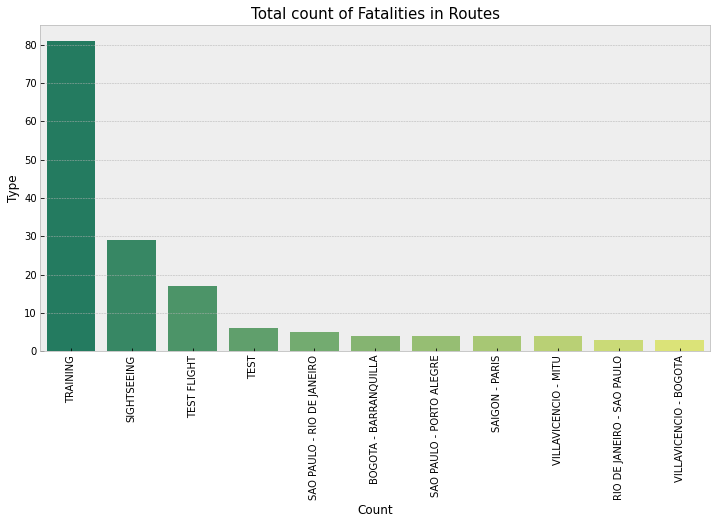

In [112]:
plt.figure(figsize=(12,6))
sns.barplot(x=Total_by_route.index, y='Count', data=Total_by_route, palette='summer')
plt.xlabel('Count', fontsize=12)
plt.ylabel('Type', fontsize=12)
plt.xticks(rotation=90)
plt.title("Total count of Fatalities in Routes", fontsize=15)
plt.show()